In [8]:
import numpy as np
import jax.numpy as jnp
import jax
import bayes3d as b
import time
from PIL import Image
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt
import cv2
import trimesh
import os
import glob
import bayes3d.neural
import pickle
# Can be helpful for debugging:
# jax.config.update('jax_enable_checks', True) 
from bayes3d.neural.segmentation import carvekit_get_foreground_mask
import genjax
from bayes3d.viz.open3dviz import Open3DVisualizer


In [27]:
b.setup_visualizer()

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7020/static/


In [4]:
base_intrinsics = b.Intrinsics(
    height=50,
    width=50,
    fx=250.0, fy=250.0,
    cx=25.0, cy=25.0,
    near=0.01, far=20.0
)
intrinsics = b.scale_camera_parameters(base_intrinsics, 10)

In [5]:
viz = Open3DVisualizer(intrinsics)

[Open3D INFO] EGL headless mode enabled.


In [9]:
mesh = trimesh.load("toy_plane.ply")

In [11]:
viz.make_trimesh(mesh, jnp.eye(4), jnp.array([1.0, 0.0, 0.0, 1.0]))

In [23]:
camera_pose = b.t3d.transform_from_pos_target_up(
        jnp.array([0.0, -1.5, 1.50]),
        jnp.array([0.0, 0.0, 0.0]),
        jnp.array([0.0, 0.0, 1.0]),
    )



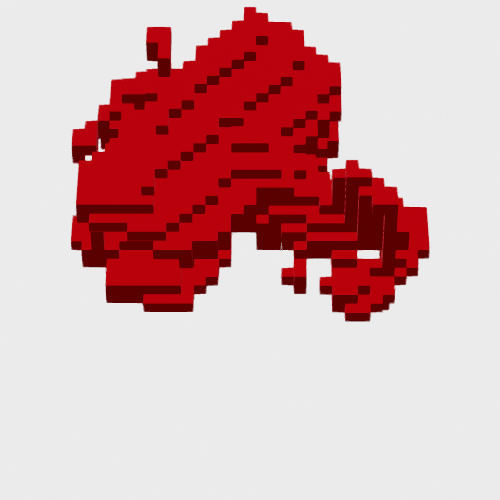

In [24]:
rgbd = viz.capture_image(intrinsics, camera_pose)
b.get_rgb_image(rgbd.rgb)

In [66]:
b.utils.ycb_loader.MODEL_NAMES[12]

'024_bowl'

In [68]:
vertices = mesh.vertices / 1000.0

In [83]:
ids = [12,13,10]
colors = b.distinct_colors(10)
IDX = 0

In [84]:
model_dir = os.path.join(b.utils.get_assets_dir(),"bop/ycbv/models")
mesh_path = os.path.join(model_dir,"obj_" + "{}".format(ids[IDX]+1).rjust(6, '0') + ".ply")
mesh = trimesh.load(mesh_path)

In [85]:
resolution = 0.005
v = b.utils.voxelize(vertices, resolution)
new_mesh = b.utils.make_voxel_mesh_from_point_cloud(v, resolution)


In [87]:
# b.show_trimesh("1", new_mesh, color=(0.2, 0.2, 0.5))
b.show_trimesh("1", new_mesh, color=colors[IDX][:3])

In [82]:
mesh = trimesh.load("toy_plane.ply")
b.show_trimesh("1", mesh, color=(0.7, 0.1, 0.1))
